# Model Training

In [1]:
import os
os.chdir('../')
from IPython.display import Image

%pip install ultralytics comet_ml appengine-python-standard -qU
from ultralytics import YOLO
import comet_ml

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gradient 2.0.6 requires attrs<=19, but you have attrs 23.1.0 which is incompatible.
Note: you may need to restart the kernel to use updated packages.


In [2]:
# Initialising comet
comet_ml.init(project_name='retail_vision_analysis-Yolov8')

Please paste your Comet API key from https://www.comet.com/api/my/settings/
(api key may not show as you type)


Comet API key:  ········


COMET INFO: Valid Comet API Key saved in /root/.comet.config (set COMET_CONFIG to change where it is saved).


**Creating a configuration file for training**

In [3]:
%%writefile train_config.yaml
# Path to the dataset
path: '../datasets'
train: 'images/train'
val: 'images/val'

# Classes details
names:
    0: person

Overwriting train_config.yaml


## YOLOv8M Model Training

### Experiment No. 1

In [ ]:
# Loading the model
model = YOLO('yolov8m.pt')

# Training the model
results = model.train(data='train_config.yaml',
                      imgsz=640,
                      epochs=200,
                      patience=10,
                      save_period=20,
                      project='retail_vision_training_logs',
                      name='exp1_yolov8m_ep200_pat20')

Ultralytics YOLOv8.0.117 🚀 Python-3.9.16 torch-1.12.1+cu116 CUDA:0 (NVIDIA RTX A4000, 16117MiB)
WARNING ⚠️ Upgrade to torch>=2.0.0 for deterministic training.
yolo/engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=train_config.yaml, epochs=200, patience=10, batch=16, imgsz=640, save=True, save_period=20, cache=False, device=None, workers=8, project=retail_vision_training_logs, name=exp1_yolov8m_ep200_pat20, exist_ok=False, pretrained=False, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=0, resume=False, amp=True, fraction=1.0, profile=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes

  0%|          | 0.00/755k [00:00<?, ?B/s]

Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1      1392  ultralytics.nn.modules.conv.Conv             [3, 48, 3, 2]                 
  1                  -1  1     41664  ultralytics.nn.modules.conv.Conv             [48, 96, 3, 2]                
  2                  -1  2    111360  ultralytics.nn.modules.block.C2f             [96, 96, 2, True]             
  3                  -1  1    166272  ultralytics.nn.modules.conv.Conv             [96, 192, 3, 2]               
  4                  -1  4    813312  ultralytics.nn.modules.block.C2f             [192, 192, 4, True]           
  5                  -1  1    664320  ultralytics.nn.modules.conv.Conv             [192, 384, 3, 2]              
  6                  -1  4   3248640  ultralytics.nn.modules.block.C2f             [384, 384, 4, True]           
  7                  -1  1   1991808  ultralytics

  ········


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


AMP: running Automatic Mixed Precision (AMP) checks with YOLOv8n...
AMP: checks passed ✅
train: Scanning /notebooks/datasets/labels/train.cache... 8664 images, 210 backgrounds, 0 corrupt: 100%|██████████| 8664/8664 [00:00<?, ?it/s]
val: Scanning /notebooks/datasets/labels/val.cache... 2167 images, 56 backgrounds, 0 corrupt: 100%|██████████| 2167/2167 [00:00<?, ?it/s]
Plotting labels to retail_vision_training_logs/exp1_yolov8m_ep200_pat20/labels.jpg... 
optimizer: SGD(lr=0.01, momentum=0.9) with parameter groups 77 weight(decay=0.0), 84 weight(decay=0.0005), 83 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to retail_vision_training_logs/exp1_yolov8m_ep200_pat20
Starting training for 200 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/200      6.43G      1.153     0.6524      1.103         51        640: 100%|██████████| 542/542 [02:31<00:00,  3.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 68/68 [00:15<00:00,  4.44it/s]
                   all       2167       9573      0.971      0.939      0.981      0.713

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
      2/200      6.66G     0.9808     0.4939      1.019         89        640: 100%|██████████| 542/542 [02:24<00:00,  3.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 68/68 [00:14<00:00,  4.61it/s]
                   all       2167       9573      0.973      0.949      0.983      0.732

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
      3/200      6.66G     0.9767     0.5144      1.028         30        640: 100%|██████████| 542/542 [02:23<00:00,  3.78it/s]
 

### Experiment No. 1 - Resuming Model Training

In [4]:
# Loading the model
model = YOLO('retail_vision_training_logs/exp1_yolov8m_ep200_pat20/weights/last.pt')

# Training the model
results = model.train(resume=True)

Ultralytics YOLOv8.0.117 🚀 Python-3.9.16 torch-1.12.1+cu116 CUDA:0 (Quadro P5000, 16279MiB)
WARNING ⚠️ Upgrade to torch>=2.0.0 for deterministic training.
yolo/engine/trainer: task=detect, mode=train, model=retail_vision_training_logs/exp1_yolov8m_ep200_pat20/weights/last.pt, data=train_config.yaml, epochs=200, patience=10, batch=16, imgsz=640, save=True, save_period=20, cache=False, device=None, workers=8, project=retail_vision_training_logs, name=exp1_yolov8m_ep200_pat20, exist_ok=False, pretrained=False, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=0, resume=False, amp=True, fraction=1.0, profile=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, line_width=None, visua

  0%|          | 0.00/755k [00:00<?, ?B/s]

COMET WARNING: To get all data logged automatically, import comet_ml before the following modules: torch.
COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are logged before exiting.
COMET INFO: Experiment is live on comet.com https://www.comet.com/johnppinto/retail-vision-training-logs/f7e930e73f12404686322ff4da8a737a

TensorBoard: Start with 'tensorboard --logdir retail_vision_training_logs/exp1_yolov8m_ep200_pat20', view at http://localhost:6006/
wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

  ········


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc



                   from  n    params  module                                       arguments                     
  0                  -1  1      1392  ultralytics.nn.modules.conv.Conv             [3, 48, 3, 2]                 
  1                  -1  1     41664  ultralytics.nn.modules.conv.Conv             [48, 96, 3, 2]                
  2                  -1  2    111360  ultralytics.nn.modules.block.C2f             [96, 96, 2, True]             
  3                  -1  1    166272  ultralytics.nn.modules.conv.Conv             [96, 192, 3, 2]               
  4                  -1  4    813312  ultralytics.nn.modules.block.C2f             [192, 192, 4, True]           
  5                  -1  1    664320  ultralytics.nn.modules.conv.Conv             [192, 384, 3, 2]              
  6                  -1  4   3248640  ultralytics.nn.modules.block.C2f             [384, 384, 4, True]           
  7                  -1  1   1991808  ultralytics.nn.modules.conv.Conv             [384

Resuming training from retail_vision_training_logs/exp1_yolov8m_ep200_pat20/weights/last.pt from epoch 134 to 200 total epochs
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to retail_vision_training_logs/exp1_yolov8m_ep200_pat20
Starting training for 200 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
    134/200      8.41G     0.3027     0.1792     0.8166         51        640: 100%|██████████| 542/542 [08:20<00:00,  1.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 68/68 [00:44<00:00,  1.54it/s]
                   all       2167       9573      0.989      0.991      0.995      0.974

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
    135/200      8.73G     0.3103     0.1829     0.8195         89        640: 100%|██████████| 542/542 [08:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P         

KeyboardInterrupt: 

In [ ]:
# Loading the model
model = YOLO('retail_vision_training_logs/exp1_yolov8m_ep200_pat20/weights/last.pt')

# Training the model
results = model.train(resume=True)

Ultralytics YOLOv8.0.117 🚀 Python-3.9.16 torch-1.12.1+cu116 CUDA:0 (NVIDIA RTX A4000, 16117MiB)
WARNING ⚠️ Upgrade to torch>=2.0.0 for deterministic training.
yolo/engine/trainer: task=detect, mode=train, model=retail_vision_training_logs/exp1_yolov8m_ep200_pat20/weights/last.pt, data=train_config.yaml, epochs=200, patience=10, batch=16, imgsz=640, save=True, save_period=20, cache=False, device=None, workers=8, project=retail_vision_training_logs, name=exp1_yolov8m_ep200_pat20, exist_ok=False, pretrained=False, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=0, resume=False, amp=True, fraction=1.0, profile=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, line_width=None, v

  0%|          | 0.00/755k [00:00<?, ?B/s]

COMET WARNING: To get all data logged automatically, import comet_ml before the following modules: torch.
COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are logged before exiting.
COMET INFO: Experiment is live on comet.com https://www.comet.com/johnppinto/retail-vision-training-logs/6431ff4584554e13a79d1591432ecf80

TensorBoard: Start with 'tensorboard --logdir retail_vision_training_logs/exp1_yolov8m_ep200_pat20', view at http://localhost:6006/
wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

  ········


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc



                   from  n    params  module                                       arguments                     
  0                  -1  1      1392  ultralytics.nn.modules.conv.Conv             [3, 48, 3, 2]                 
  1                  -1  1     41664  ultralytics.nn.modules.conv.Conv             [48, 96, 3, 2]                
  2                  -1  2    111360  ultralytics.nn.modules.block.C2f             [96, 96, 2, True]             
  3                  -1  1    166272  ultralytics.nn.modules.conv.Conv             [96, 192, 3, 2]               
  4                  -1  4    813312  ultralytics.nn.modules.block.C2f             [192, 192, 4, True]           
  5                  -1  1    664320  ultralytics.nn.modules.conv.Conv             [192, 384, 3, 2]              
  6                  -1  4   3248640  ultralytics.nn.modules.block.C2f             [384, 384, 4, True]           
  7                  -1  1   1991808  ultralytics.nn.modules.conv.Conv             [384

    151/200      6.55G     0.2769     0.1676     0.8121         51        640: 100%|██████████| 542/542 [02:21<00:00,  3.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 68/68 [00:16<00:00,  4.19it/s]
                   all       2167       9573       0.99      0.991      0.995      0.974

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
    152/200      6.67G     0.2846     0.1711     0.8134         89        640: 100%|██████████| 542/542 [03:00<00:00,  3.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 68/68 [00:15<00:00,  4.47it/s]
                   all       2167       9573       0.99      0.991      0.995      0.974

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
    153/200      6.66G     0.2903     0.1742     0.8137         30        640: 100%|██████████| 542/542 [02:21<00:00,  3.84it/s]
 

**Model training is completed, checking the validation result for last and best weights.**

In [5]:
# Validation on last.pt
model = YOLO('retail_vision_training_logs/exp1_yolov8m_ep200_pat20/weights/last.pt')
metrics = model.val()

Ultralytics YOLOv8.0.117 🚀 Python-3.9.16 torch-1.12.1+cu116 CUDA:0 (Quadro RTX 5000, 16125MiB)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients
val: Scanning /notebooks/datasets/labels/val.cache... 2167 images, 56 backgrounds, 0 corrupt: 100%|██████████| 2167/2167 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 136/136 [00:32<00:00,  4.15it/s]
                   all       2167       9573      0.991      0.991      0.995      0.976
Speed: 0.2ms preprocess, 8.9ms inference, 0.0ms loss, 0.9ms postprocess per image
Results saved to runs/detect/val


In [6]:
# Validation on best.pt
model = YOLO('retail_vision_training_logs/exp1_yolov8m_ep200_pat20/weights/best.pt')
metrics = model.val()

Ultralytics YOLOv8.0.117 🚀 Python-3.9.16 torch-1.12.1+cu116 CUDA:0 (Quadro RTX 5000, 16125MiB)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients
val: Scanning /notebooks/datasets/labels/val.cache... 2167 images, 56 backgrounds, 0 corrupt: 100%|██████████| 2167/2167 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 136/136 [00:31<00:00,  4.26it/s]
                   all       2167       9573      0.991      0.991      0.995      0.976
Speed: 0.2ms preprocess, 8.5ms inference, 0.0ms loss, 1.2ms postprocess per image
Results saved to runs/detect/val2


### Model Training Result

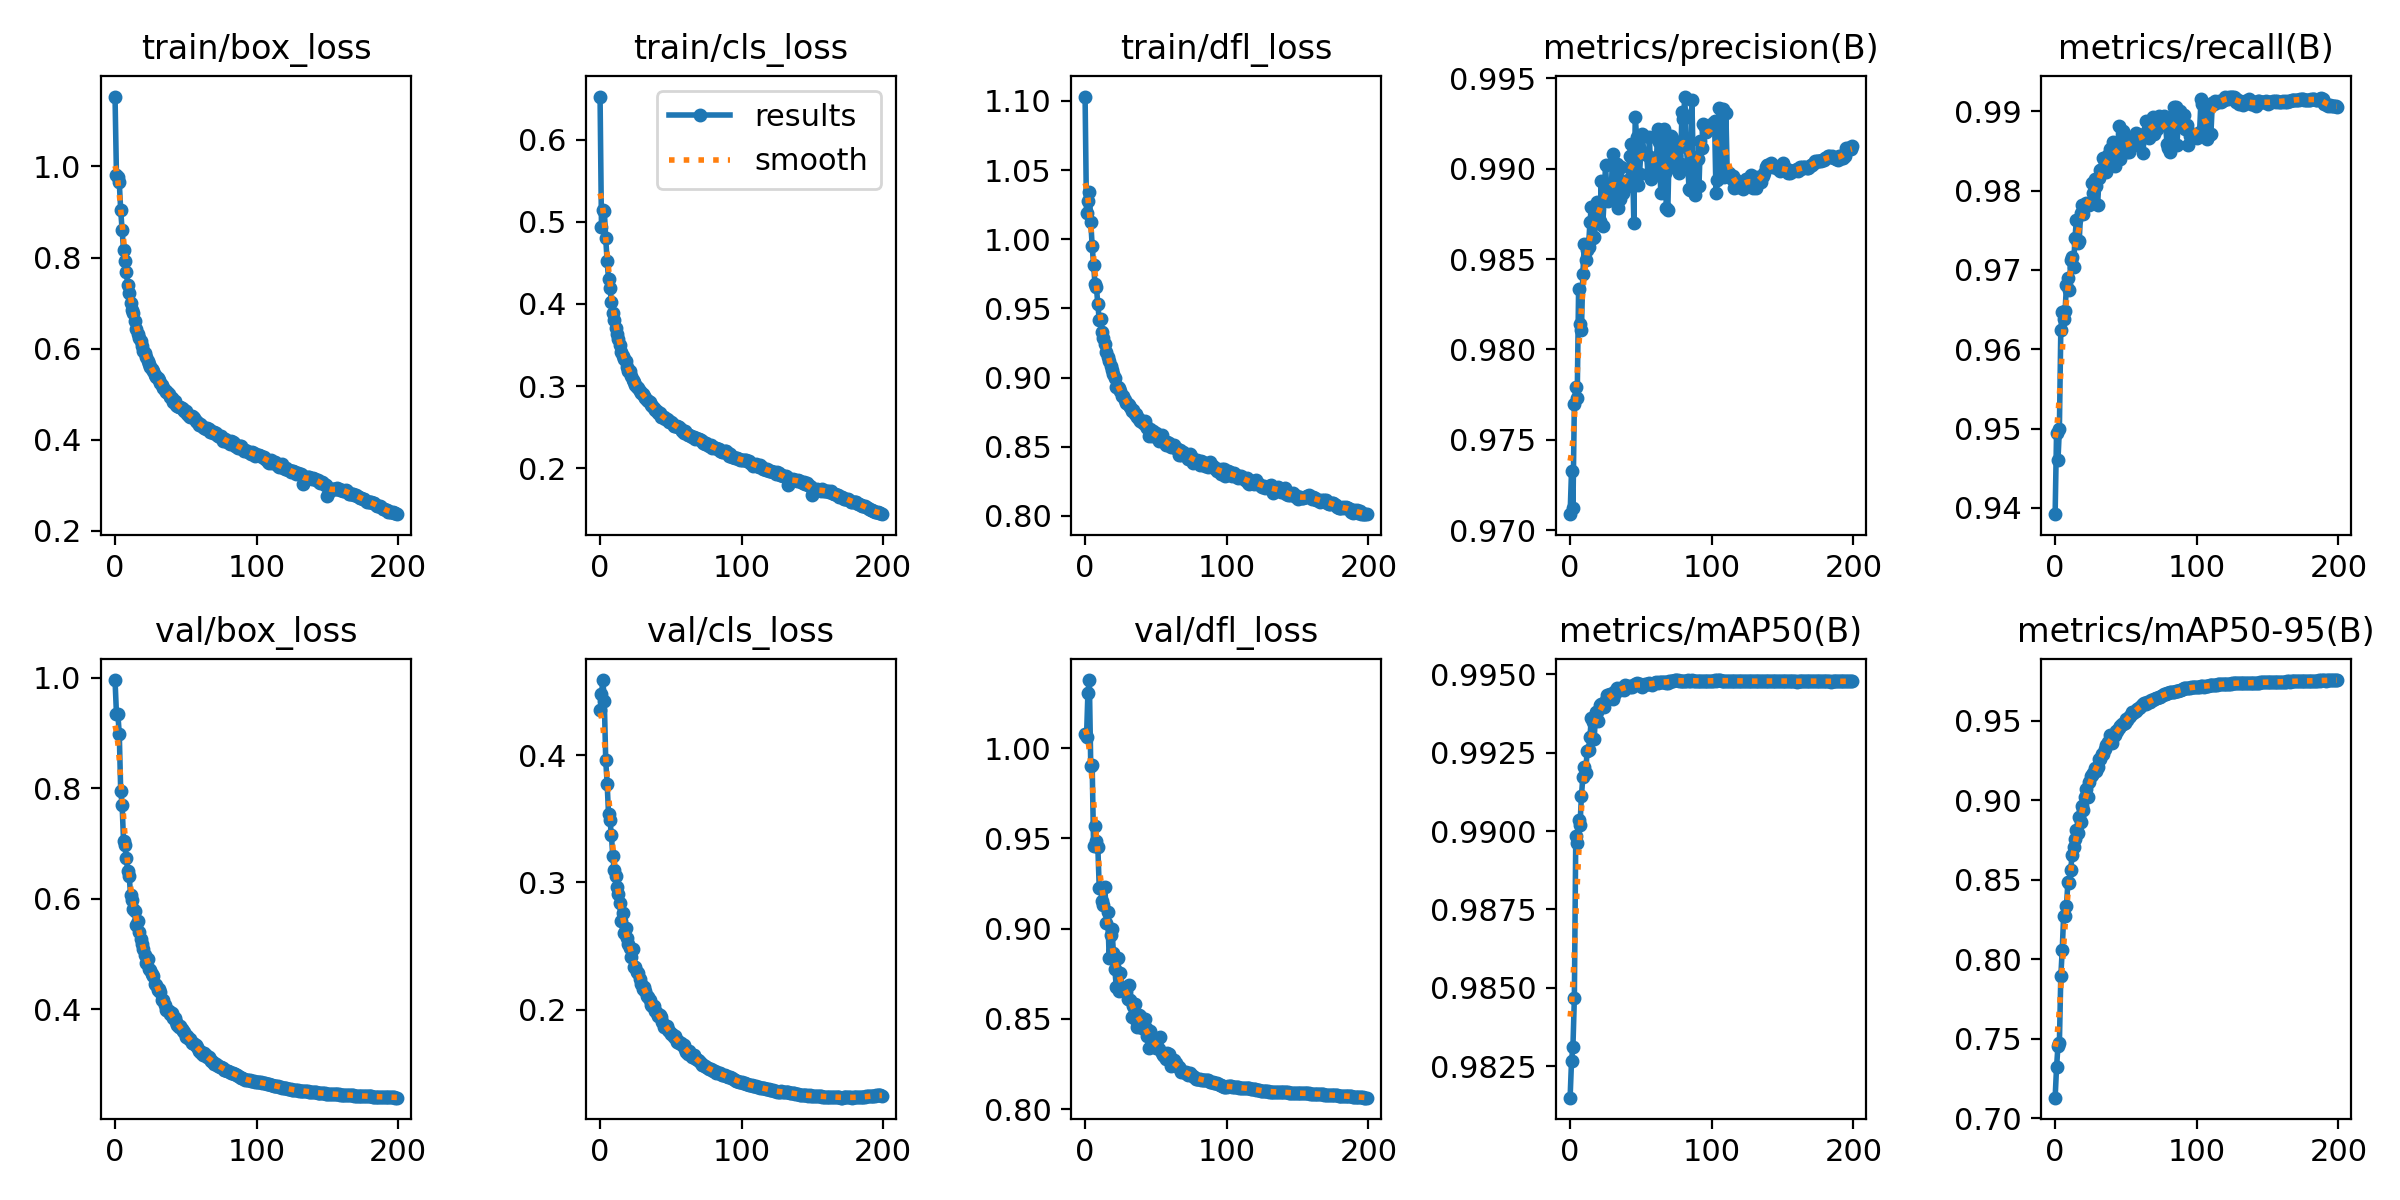

In [7]:
# Visualizing the result image
Image('retail_vision_training_logs/exp1_yolov8m_ep200_pat20/results.png')

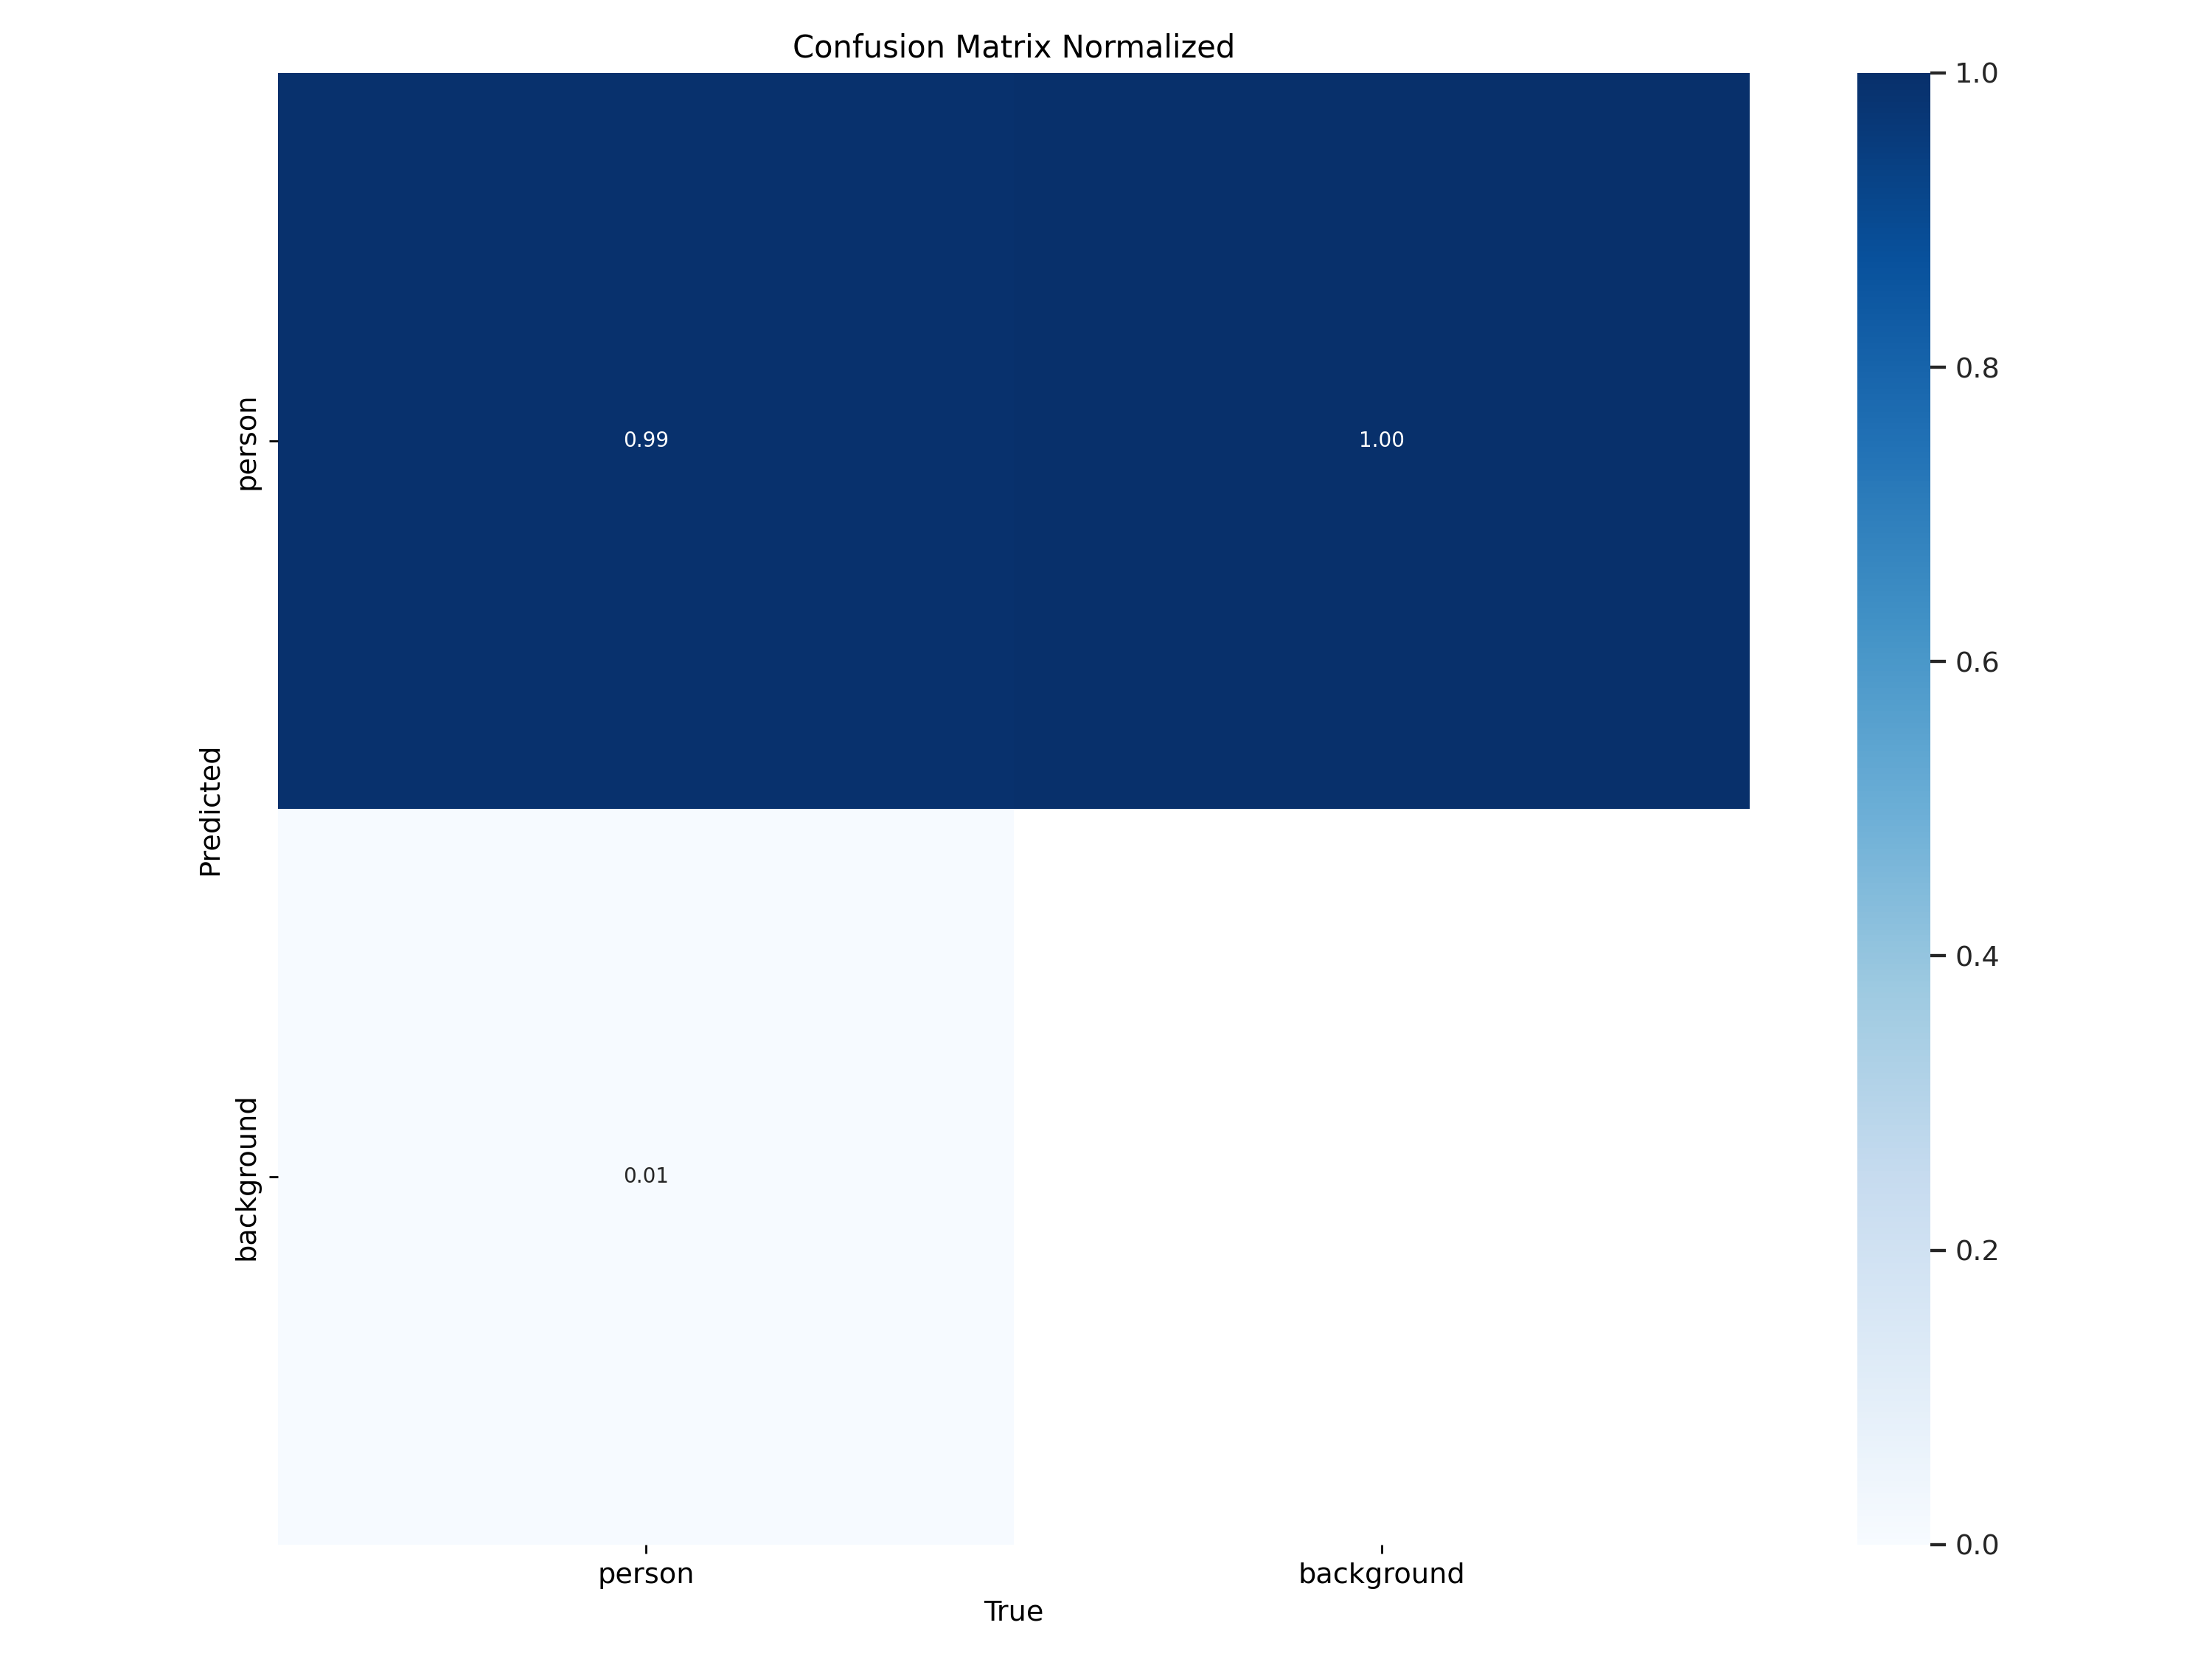

In [9]:
# Visualizing the normalized confusion matrix
Image('retail_vision_training_logs/exp1_yolov8m_ep200_pat20/confusion_matrix_normalized.png')